In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [36]:
df = pd.read_csv("HomeC.csv")
df.head()


C:\Users\DELL\AppData\Local\Temp\ipykernel_10904\3441065335.py:1: DtypeWarning: Columns (27) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("HomeC.csv")


,time,use [kW],gen [kW],House overall [kW],Dishwasher [kW],Furnace 1 [kW],Furnace 2 [kW],Home office [kW],Fridge [kW],Wine cellar [kW],...,visibility,summary,apparentTemperature,pressure,windSpeed,cloudCover,windBearing,precipIntensity,dewPoint,precipProbability
0,1451624400,0.932833,0.003483,0.932833,0.000033,0.020700,0.061917,0.442633,0.124150,0.006983,...,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0
1,1451624401,0.934333,0.003467,0.934333,0.000000,0.020717,0.063817,0.444067,0.124000,0.006983,...,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0
2,1451624402,0.931817,0.003467,0.931817,0.000017,0.020700,0.062317,0.446067,0.123533,0.006983,...,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0
3,1451624403,1.022050,0.003483,1.022050,0.000017,0.106900,0.068517,0.446583,0.123133,0.006983,...,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0
4,1451624404,1.139400,0.003467,1.139400,0.000133,0.236933,0.063983,0.446533,0.122850,0.006850,...,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0


In [37]:
print("Shape:", df.shape)
df.info()


Shape: (108793, 32)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108793 entries, 0 to 108792
Data columns (total 32 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   time                 108793 non-null  int64  
 1   use [kW]             108793 non-null  float64
 2   gen [kW]             108793 non-null  float64
 3   House overall [kW]   108793 non-null  float64
 4   Dishwasher [kW]      108793 non-null  float64
 5   Furnace 1 [kW]       108793 non-null  float64
 6   Furnace 2 [kW]       108793 non-null  float64
 7   Home office [kW]     108793 non-null  float64
 8   Fridge [kW]          108793 non-null  float64
 9   Wine cellar [kW]     108792 non-null  float64
 10  Garage door [kW]     108792 non-null  float64
 11  Kitchen 12 [kW]      108792 non-null  float64
 12  Kitchen 14 [kW]      108792 non-null  float64
 13  Kitchen 38 [kW]      108792 non-null  float64
 14  Barn [kW]            108792 non-null  float64
 1

In [38]:
df.isnull().sum()
df.duplicated().sum()


np.int64(0)

In [39]:
df['time'] = pd.to_datetime(df['time'], unit='s')
df.set_index('time', inplace=True)

df.index.min(), df.index.max()


(Timestamp('2016-01-01 05:00:00'), Timestamp('2016-01-02 11:13:12'))

In [40]:
df.index.to_series().diff().value_counts().head()


time
0 days 00:00:01    108792
Name: count, dtype: int64

In [42]:
hourly = df.resample('h').mean(numeric_only=True)
hourly.head()


,use [kW],gen [kW],House overall [kW],Dishwasher [kW],Furnace 1 [kW],Furnace 2 [kW],Home office [kW],Fridge [kW],Wine cellar [kW],Garage door [kW],...,temperature,humidity,visibility,apparentTemperature,pressure,windSpeed,windBearing,precipIntensity,dewPoint,precipProbability
time,,,,,,,,,,,,,,,,,,,,,
2016-01-01 05:00:00,1.187276,0.038035,1.187276,0.055087,0.209051,0.236018,0.091815,0.066464,0.019766,0.013373,...,33.010339,0.609728,9.905267,26.325956,1013.323967,7.733644,250.486667,0.000035,20.923411,0.000644
2016-01-01 06:00:00,1.119695,0.080241,1.119695,0.044929,0.237062,0.251944,0.131420,0.052407,0.019162,0.013601,...,18.775006,0.584022,9.916806,9.766472,1024.161161,8.287394,293.827222,0.000000,6.187989,0.000000
2016-01-01 07:00:00,0.953479,0.074560,0.953479,0.036512,0.225252,0.204517,0.100471,0.066452,0.017028,0.013425,...,24.236133,0.614706,9.929494,20.451156,1027.502767,3.838150,131.142778,0.000000,11.636817,0.000000
2016-01-01 08:00:00,1.080323,0.013110,1.080323,0.030701,0.157488,0.187387,0.097202,0.057517,0.021887,0.014500,...,39.956900,0.784944,8.501144,36.097106,1012.871561,6.648811,116.138889,0.010007,33.599206,0.147417
2016-01-01 09:00:00,1.064834,0.046615,1.064834,0.042406,0.236579,0.272748,0.099082,0.057820,0.015738,0.013374,...,24.463689,0.562878,9.119567,15.937556,1010.960267,9.551461,241.294444,0.000385,10.398067,0.014661


In [43]:
df['Kitchen_Total'] = (
    df['Kitchen 12 [kW]'] +
    df['Kitchen 14 [kW]'] +
    df['Kitchen 38 [kW]']
)


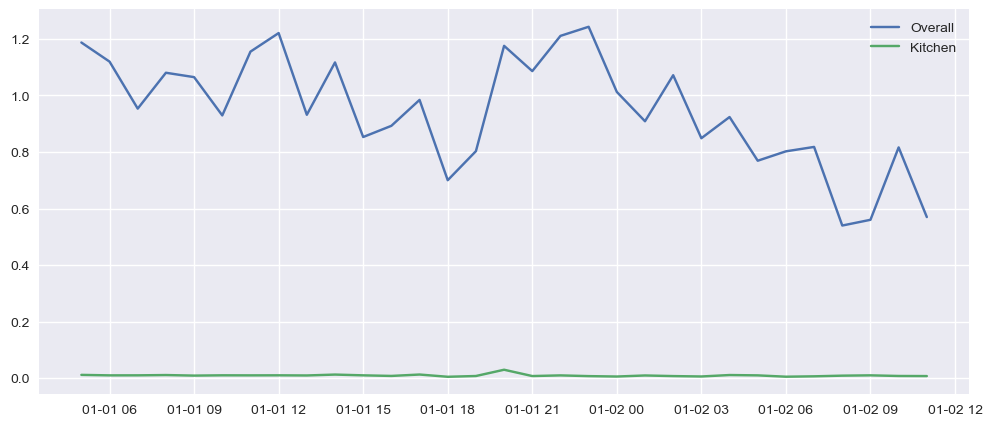

In [44]:
comparison = df[['House overall [kW]', 'Kitchen_Total']].resample('h').mean()

plt.figure(figsize=(12,5))
plt.plot(comparison['House overall [kW]'], label="Overall")
plt.plot(comparison['Kitchen_Total'], label="Kitchen")
plt.legend()
plt.show()


In [45]:
df['Kitchen_%'] = (df['Kitchen_Total'] / df['House overall [kW]']) * 100
df['Kitchen_%'].describe()


count    108792.000000
mean          0.859277
std          10.210437
min           0.000000
25%           0.060474
50%           0.094299
75%           0.164298
max        2302.402402
Name: Kitchen_%, dtype: float64

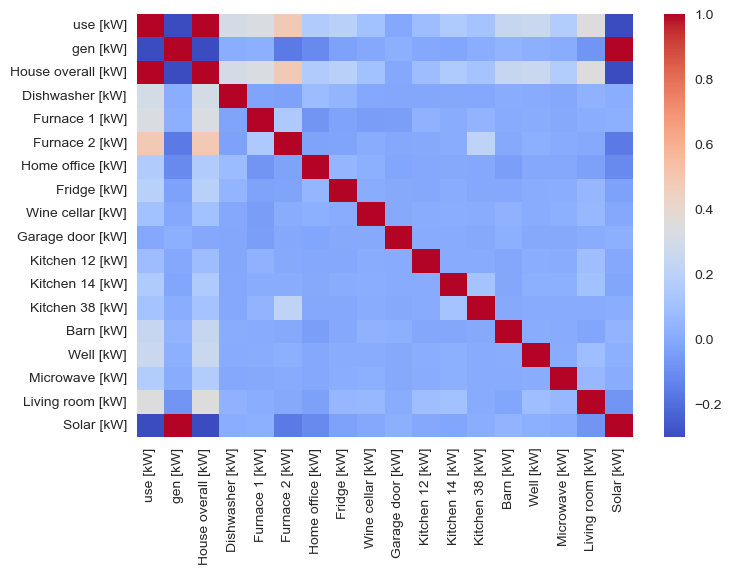

In [46]:
energy_cols = [col for col in df.columns if '[kW]' in col]
sns.heatmap(df[energy_cols].corr(), cmap='coolwarm')
plt.show()


In [47]:
mean_vals = df[energy_cols].mean()
std_vals = df[energy_cols].std()

pd.DataFrame({
    "Mean": mean_vals,
    "Standard Deviation": std_vals
})


,Mean,Standard Deviation
use [kW],0.956471,0.683917
gen [kW],0.066935,0.129032
House overall [kW],0.956471,0.683917
Dishwasher [kW],0.033798,0.198033
Furnace 1 [kW],0.192918,0.211832
Furnace 2 [kW],0.221994,0.241042
Home office [kW],0.078773,0.097402
Fridge [kW],0.053771,0.070946
Wine cellar [kW],0.020883,0.036835
Garage door [kW],0.013710,0.009732


In [48]:
cv = (std_vals / mean_vals) * 100

pd.DataFrame({
    "Mean": mean_vals,
    "Std": std_vals,
    "CV (%)": cv
})


,Mean,Std,CV (%)
use [kW],0.956471,0.683917,71.504248
gen [kW],0.066935,0.129032,192.771679
House overall [kW],0.956471,0.683917,71.504248
Dishwasher [kW],0.033798,0.198033,585.940973
Furnace 1 [kW],0.192918,0.211832,109.804547
Furnace 2 [kW],0.221994,0.241042,108.580568
Home office [kW],0.078773,0.097402,123.649302
Fridge [kW],0.053771,0.070946,131.940554
Wine cellar [kW],0.020883,0.036835,176.386291
Garage door [kW],0.013710,0.009732,70.981749


In [49]:
mean_vals.sort_values(ascending=False)


use [kW]              0.956471
House overall [kW]    0.956471
Furnace 2 [kW]        0.221994
Furnace 1 [kW]        0.192918
Home office [kW]      0.078773
gen [kW]              0.066935
Solar [kW]            0.066933
Barn [kW]             0.063928
Fridge [kW]           0.053771
Living room [kW]      0.039231
Dishwasher [kW]       0.033798
Wine cellar [kW]      0.020883
Well [kW]             0.017044
Garage door [kW]      0.013710
Microwave [kW]        0.009625
Kitchen 14 [kW]       0.007424
Kitchen 12 [kW]       0.002332
Kitchen 38 [kW]       0.000010
dtype: float64

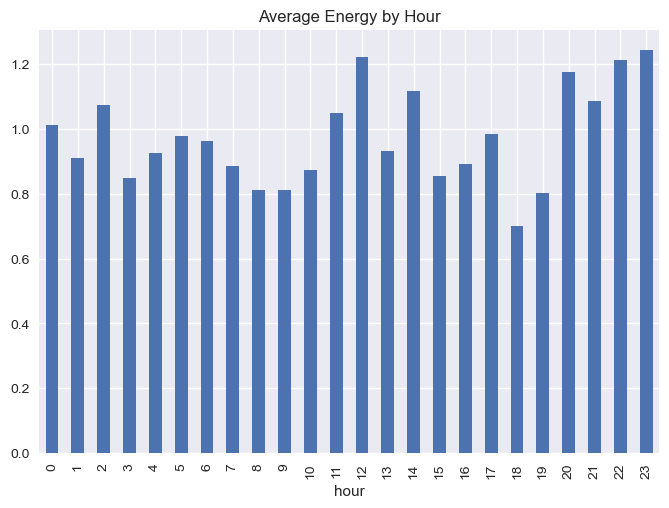

In [50]:
df['hour'] = df.index.hour
hourly_pattern = df.groupby('hour')['House overall [kW]'].mean()

hourly_pattern.plot(kind='bar')
plt.title("Average Energy by Hour")
plt.show()


In [51]:
threshold = mean_vals + (2 * std_vals)
threshold


use [kW]              2.324306
gen [kW]              0.325000
House overall [kW]    2.324306
Dishwasher [kW]       0.429864
Furnace 1 [kW]        0.616583
Furnace 2 [kW]        0.704079
Home office [kW]      0.273578
Fridge [kW]           0.195662
Wine cellar [kW]      0.094554
Garage door [kW]      0.033173
Kitchen 12 [kW]       0.052250
Kitchen 14 [kW]       0.168735
Kitchen 38 [kW]       0.000031
Barn [kW]             0.371568
Well [kW]             0.302883
Microwave [kW]        0.181169
Living room [kW]      0.242928
Solar [kW]            0.324993
dtype: float64